In [1]:
import pandas as pd
from scipy.stats import pearsonr

from modules.plotting_scripts import plot_surprisals, plot_all_in_one, corr_plot

In [2]:
def calculate_correlations(group, pairs):
    correlations = {}
    for col1, col2 in pairs:
        if len(group) < 2:
            correlations[f"{col1}_{col2}_corr"] = None
        else:
            corr, _ = pearsonr(group[col1], group[col2])
            correlations[f"{col1}_{col2}_corr"] = corr
    return pd.Series(correlations)

In [3]:
sample10_path = '../results/lexique_results/sample10_surprisals.txt'
sample10_surprisals = pd.read_csv(sample10_path, delimiter='\t')
sample10_surprisals

,Steps,Token,MedianRank,MeanSurprisal,StdevSurprisal,MeanNegSurprisal,StdevNegSurprisal,Accuracy,NumExamples
0,0,a,3890,14.213918,0.346971,14.195665,0.361547,0.000000,512
1,0,by,27737,16.030943,0.439596,16.029408,0.433057,0.000000,512
2,0,constraint,7480,14.581973,NaN,15.168314,NaN,0.000000,1
3,0,exploring,9474,14.721373,NaN,15.508900,NaN,0.000000,1
4,0,fined,15770,15.096849,NaN,14.677059,NaN,0.000000,1
...,...,...,...,...,...,...,...,...,...
285,2000000,of,0,0.334707,1.122243,18.036840,5.301032,0.943359,512
286,2000000,sob,3805,18.751545,NaN,24.932291,NaN,0.000000,1
287,2000000,the,0,0.329209,0.781387,16.573214,6.084897,0.945312,512
288,2000000,variable,8835,18.539169,NaN,21.833714,NaN,0.000000,1


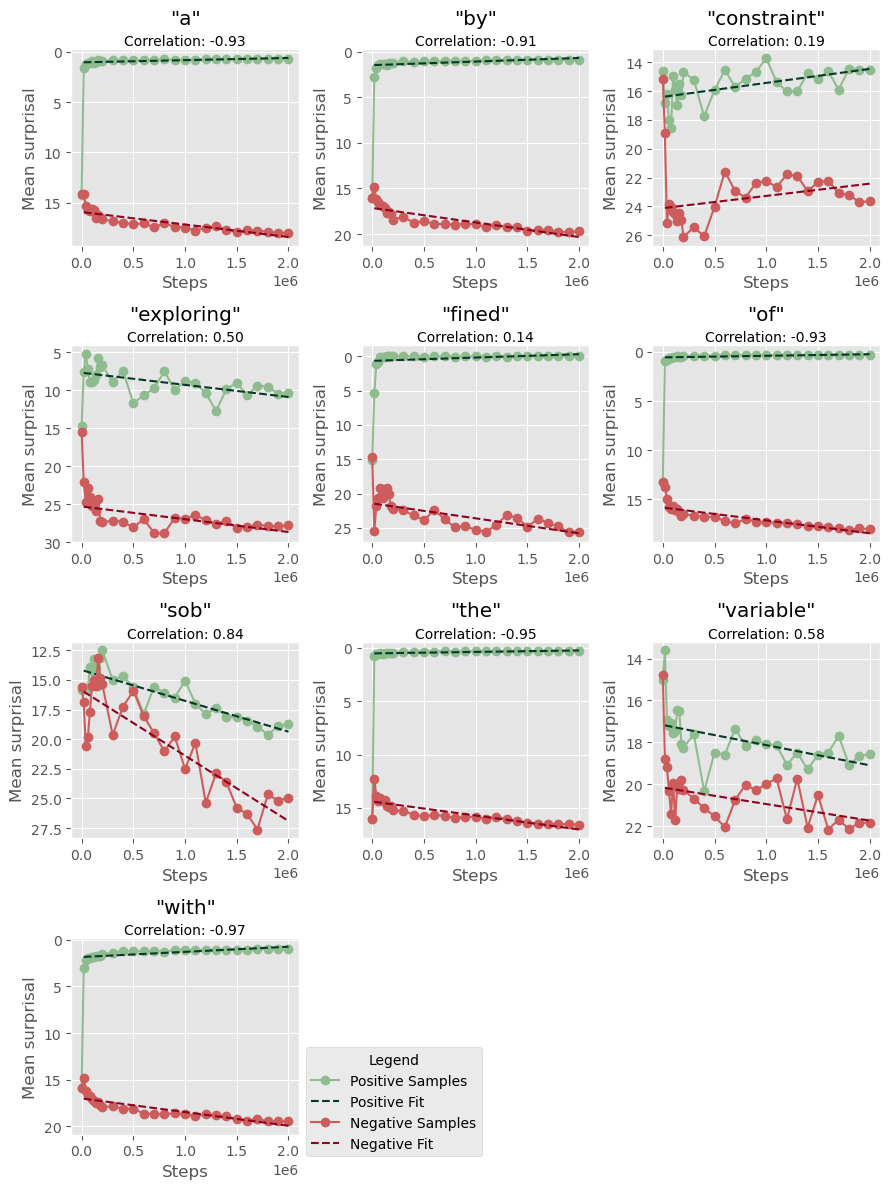

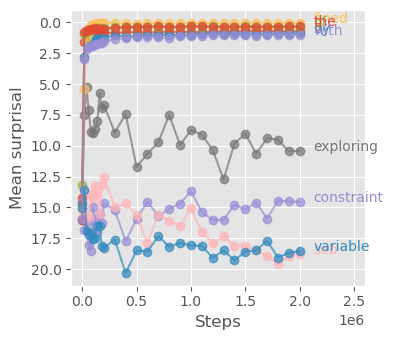

In [4]:
plot_surprisals(sample10_surprisals.Token.unique(), sample10_surprisals, neg_samples=True, first_step=False, fit_line=True)
plot_all_in_one(sample10_surprisals.Token.unique(), sample10_surprisals)

In [5]:
sample40_indiv_path = '../results/lexique_results/sample40_IndivSurprisals.tsv'
sample40_indiv_surprisals = pd.read_csv(sample40_indiv_path, delimiter='\t')

sample40_indiv_surprisals = sample40_indiv_surprisals.assign(
    MeanSurprisal=sample40_indiv_surprisals.groupby(['Steps', 'Token'])['Surprisal'].transform('mean'),
    MeanNegSurprisal=sample40_indiv_surprisals.groupby(['Steps', 'Token'])['NegSurprisal'].transform('mean')
)
sample40_indiv_surprisals

,Steps,Token,Surprisal,NegSurprisal,Example_num,MeanSurprisal,MeanNegSurprisal
0,0,absorption,14.396362,14.157569,0,14.396362,14.157569
1,0,alongside,15.195083,14.946873,0,14.647702,14.818507
2,0,alongside,15.020845,14.774744,1,14.647702,14.818507
3,0,alongside,14.622052,14.940444,2,14.647702,14.818507
4,0,alongside,14.967605,14.894263,3,14.647702,14.818507
...,...,...,...,...,...,...,...
160568,2000000,were,0.142015,29.096949,507,0.544524,20.953926
160569,2000000,were,0.056277,17.137156,508,0.544524,20.953926
160570,2000000,were,0.163436,16.676111,509,0.544524,20.953926
160571,2000000,were,0.016877,15.958269,510,0.544524,20.953926


In [6]:
column_pairs = [('Surprisal', 'MeanSurprisal'), ('Surprisal', 'NegSurprisal'), ('NegSurprisal', 'MeanNegSurprisal')]
sample40_correlations = (sample40_indiv_surprisals[sample40_indiv_surprisals['Steps'] != 0]
                         .groupby('Token')[['Surprisal', 'MeanSurprisal', 'NegSurprisal', 'MeanNegSurprisal']]
                         .apply(lambda x: calculate_correlations(x, column_pairs))
                         .reset_index())

sample40_correlations.head()

,Token,Surprisal_MeanSurprisal_corr,Surprisal_NegSurprisal_corr,NegSurprisal_MeanNegSurprisal_corr
0,absorption,1.000000,0.387884,1.000000
1,alongside,0.208112,0.141072,0.235302
2,and,0.185525,-0.039677,0.226234
3,are,0.188130,0.023422,0.203663
4,at,0.173126,-0.083247,0.194651


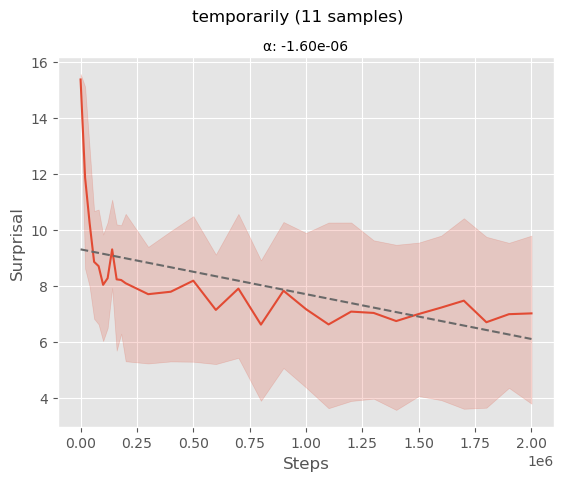

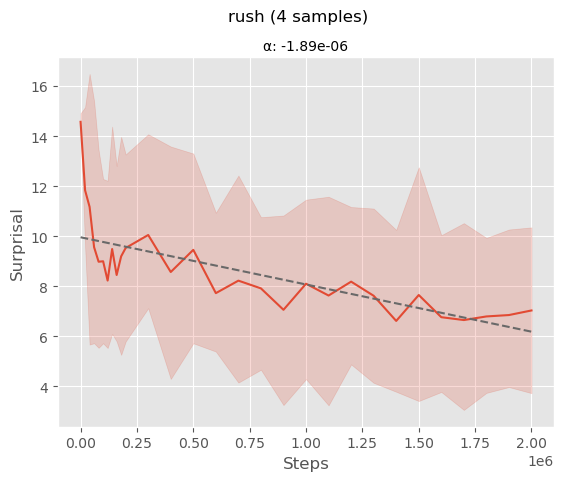

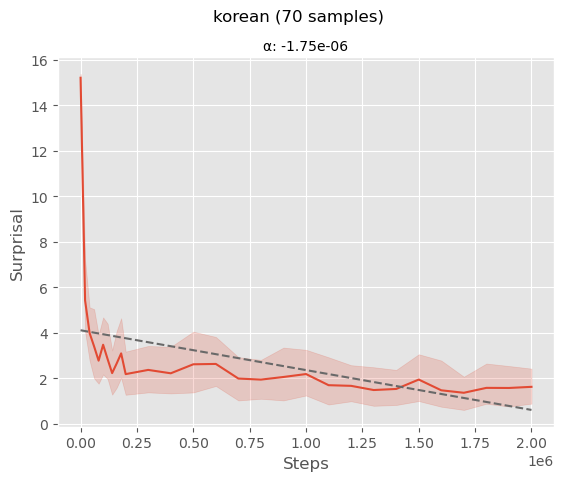

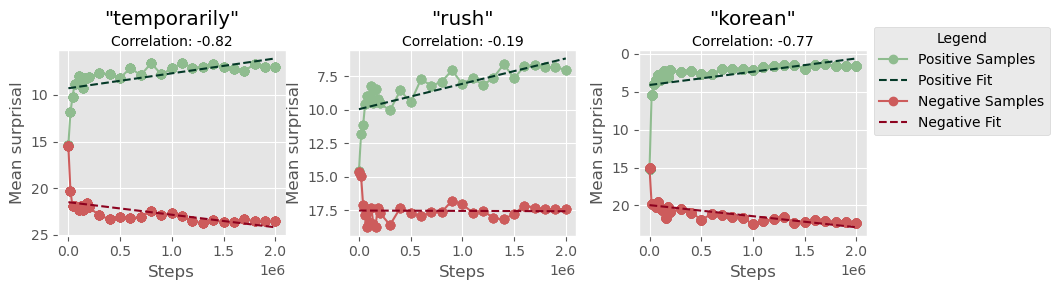

Word: temporarily
Pos-Neg Correlation: -0.8179842391221862
Metrics:
positive: {'alpha': -1.5954149213880915e-06, 'beta': 9.295474903968229, 'R2': 0.3638838149372069, 'MSE': 1.9031652285748883}
negative: {'alpha': 1.3444113703082081e-06, 'beta': 21.49764937801813, 'R2': 0.34817506326177194, 'MSE': 1.4472819655961209}

Word: rush
Pos-Neg Correlation: -0.18516132445515687
Metrics:
positive: {'alpha': -1.893070623454919e-06, 'beta': 9.963260177144758, 'R2': 0.5721700442070518, 'MSE': 1.1439970340404315}
negative: {'alpha': 2.5537964286763794e-08, 'beta': 17.528091381822964, 'R2': 0.00037473145567501476, 'MSE': 0.7427365897247822}

Word: korean
Pos-Neg Correlation: -0.7739142715191909
Metrics:
positive: {'alpha': -1.7499709472873656e-06, 'beta': 4.1165323690722175, 'R2': 0.2120241964343168, 'MSE': 4.872128231255143}
negative: {'alpha': 1.4608462129967128e-06, 'beta': 19.960875674861295, 'R2': 0.46073294446842294, 'MSE': 1.0692843171443758}



In [9]:
sample = sample40_indiv_surprisals.Token.drop_duplicates().sample(3)
corr_plot(sample, sample40_indiv_surprisals, first_step=False)
correlations, metrics = plot_surprisals(sample, sample40_indiv_surprisals, neg_samples=True, first_step=False, fit_line=True)

word_corrs = list(correlations.values())
for i, (key, metrics) in enumerate(metrics.items()):
    print(f'Word: {key}')
    print(f'Pos-Neg Correlation: {word_corrs[i]}')
    print('Metrics:')
    for key, values in metrics.items():
        print(f'{key}: {values}')
    print()